**1. Mount google drive files to google colab environment**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**2. Install tensornets**

In [2]:
pip install --user tensornets

     |████████████████████████████████| 593kB 2.9MB/s 
  Created wheel for tensornets: filename=tensornets-0.4.1-cp36-cp36m-linux_x86_64.whl size=1150456 sha256=cacea3e5ed07830392a93654d4ddb76b02076b8185a875d923ad399a89be6e6d
  Stored in directory: /root/.cache/pip/wheels/f1/26/c3/65199c9bd510659df4eee92b9aeae24dbace5e78f8b7915560
Successfully built tensornets


**3. Run specific python code**

In [3]:
!python "/content/drive/My Drive/pretrained/pretrainedCifar/vgg19_transfer_training_224_final.py"

10


Instructions for updating:
Please use `layer.__call__` method instead.

Instructions for updating:
Use keras.layers.flatten instead.



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Scope: vgg19
conv1/1/conv/BiasAdd:0 (?, 224, 224, 64)
conv1/1/Relu:0 (?, 224, 224, 64)
conv1/2/conv/BiasAdd:0 (?, 224, 224, 64)
conv1/2/Relu:0 (?, 224, 224, 64)
conv1/pool/MaxPool:0 (?, 112, 112, 64)
conv2/1/conv/BiasAdd:0 (?, 112, 112, 128)
conv2/1/Relu:0 (?, 112, 112, 128)
conv2/2/conv/BiasAdd:0 (?, 112, 112, 128)
conv2/2/Relu:0 (?, 112, 112, 128)
conv2/pool/MaxPool:0 (?, 56, 56, 128)
conv3/1/conv/BiasAdd:0 (?, 56, 56, 256)
conv3/1/Relu:0 (?, 56, 56, 256)
conv3/2/conv/BiasAdd:0 (?, 56, 56, 256)
conv3/2/Relu:0 (?, 56, 56, 256)
conv3/3/conv/BiasAdd:0 (?, 56, 56, 256)
conv3/3/Relu:0 (?, 56, 56, 256)
conv3/4/conv/BiasAdd:0 (?, 56, 56, 256)
conv3/4/Relu:0 (?, 56, 56, 256)
conv3/pool/MaxPool:0 (?, 28, 28, 256)
conv4/1/conv/BiasAdd:0 (?, 28, 28, 512)
conv4/1/

**4. Run T-SNE**

(1000, 25088) (1000,) 1000
the value of neighborhood hit is  0.7757999999999995


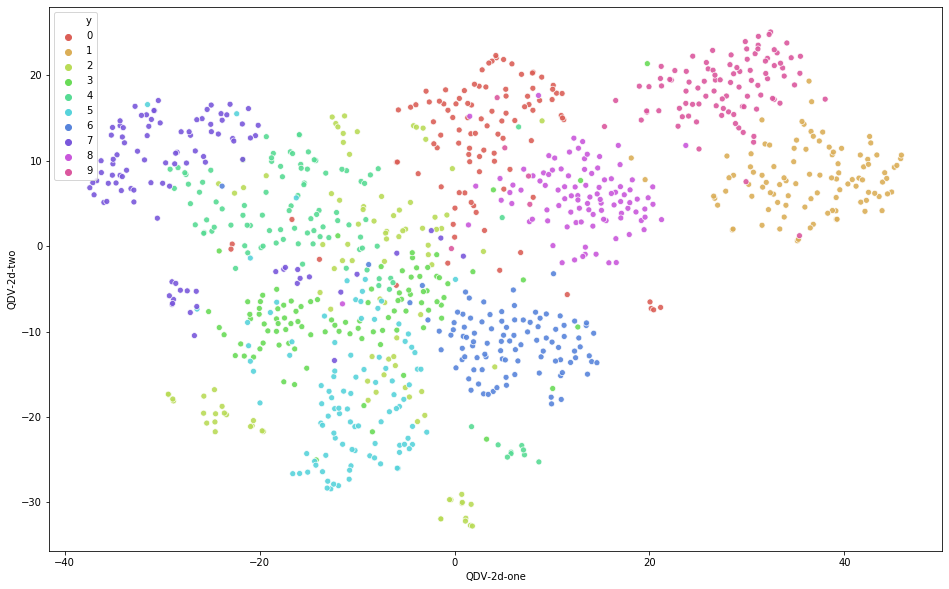

In [9]:
#Xuan wrote
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pickle
import sklearn


#Load data
f = open('h5.pckl', 'rb')
X1 = pickle.load(f)
X1 = np.reshape(X1,[X1.shape[0], -1])
f.close()

# f = open('h5.pckl', 'rb')
# X5 = pickle.load(f)
# X5 = np.reshape(X5,[X5.shape[0], -1])
# f.close()

f = open('testY.pckl', 'rb')
Y = pickle.load(f)
f.close()

print(X1.shape,Y.shape,len(Y))

#import pdb; pdb.set_trace()
n_neighbors=6

# normalization method 1
#X5 = sklearn.preprocessing.normalize(X5, norm='l2', axis=1, copy=True, return_norm=False)

# normalization method 2
X1 = (X1-np.min(X1))/(np.max(X1)-np.min(X1))

#transform to pandas dataframe
feat_cols = [ 'feature'+str(i) for i in range(X1.shape[1]) ]
df = pd.DataFrame(X1,columns=feat_cols)
df['y'] = Y
#create anonymous function i.e function having no names using a facility called lambda function
df['label'] = df['y'].apply(lambda i: str(i))

#Apply PCA before TSNE
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(df[feat_cols].values)

#Apply T-SNE
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=3000)#perplexity from 5 and 50
tsne_pca_results = tsne.fit_transform(pca_result_50)

df['QDV-2d-one'] = tsne_pca_results[:,0]
df['QDV-2d-two'] = tsne_pca_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="QDV-2d-one", y="QDV-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=0.9
)

#Calculate neighborhood hit
knn_model = NearestNeighbors(n_neighbors).fit(tsne_pca_results)

# import pdb; pdb.set_trace()
nhit = 0.0
for ith in range(len(Y)): 
    current_data_x = tsne_pca_results[ith:ith+1,:]
    distances, indices = knn_model.kneighbors(current_data_x)
    
    ns = indices.flatten().tolist()
    if ith in ns:
       ns.remove(ith)
       current_hit_value = (Y[ns] == Y[ith]).sum()/float(len(ns))
       nhit += current_hit_value    
nhit=nhit/len(Y)
print("the value of neighborhood hit is ", nhit)